In [36]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [37]:
# This takes train and test dataset 'mnist' from tfds
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
# Let's get some info about the dataset
train_images.shape

(60000, 28, 28)

In [40]:
train_ds = tfds.load('mnist', split = 'train')
example_one = train_ds.take(1)

In [41]:
#The label is a scalar. So, lets check the value of label for first example

for data in example_one:
  print(data['label'])

tf.Tensor(4, shape=(), dtype=int64)


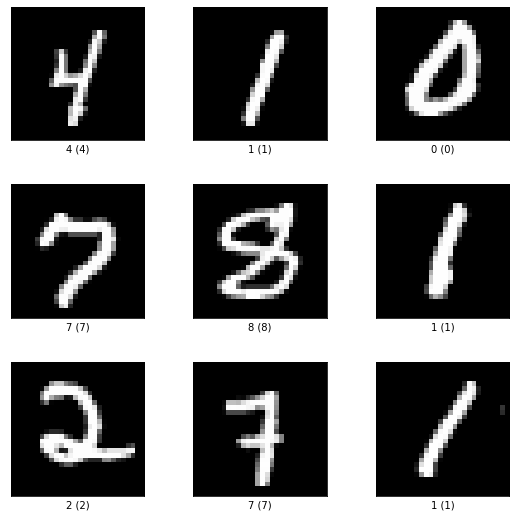

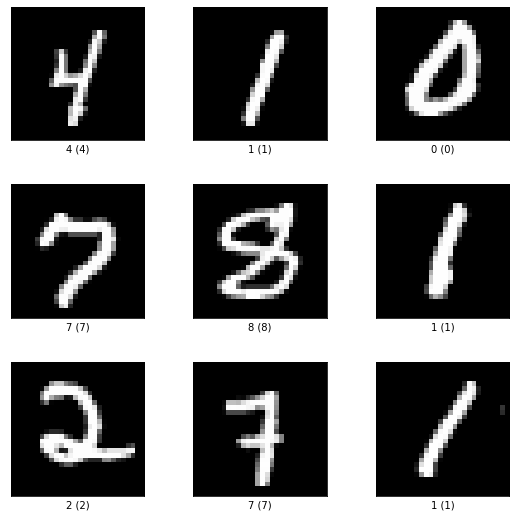

In [42]:
# First one is an image of 4.
# lets visualize the data

dataset, info = tfds.load('mnist', split = 'train', with_info=True)
tfds.show_examples(info, dataset)

In [43]:
# First one in training data is indeed a 4.
# Let's make a model using linear layers (keras) to train the data

from tensorflow.keras import layers

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10)
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [50]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6457 - accuracy: 0.8474
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3951 - accuracy: 0.9053
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2900 - accuracy: 0.9244
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9321
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2325 - accuracy: 0.9392
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2211 - accuracy: 0.9429
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2111 - accuracy: 0.9458
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1971 - accuracy: 0.9490
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1913 - accuracy: 0.9502
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.188

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.9454


In [52]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [54]:
predictions = probability_model.predict(test_images)

In [55]:
print(predictions[0])

[5.4770396e-24 5.2642323e-21 2.7617368e-11 2.1862992e-25 1.7476730e-22
 4.9439495e-21 0.0000000e+00 1.0000000e+00 2.8375775e-36 6.5721709e-28]


In [56]:
np.argmax(predictions[0])

7

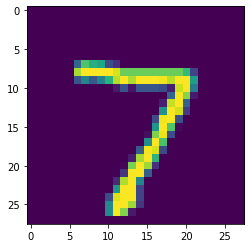

In [59]:
# Lets see if test set's 1st element was 7
plt.imshow(test_images[0])
plt.show()

In [ ]:
#